In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv("../datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### **GENERAL INFORMATION**

In [3]:
df.shape

(1338, 7)

In [4]:
print("Counts of each attribute, to give an insight if there is/are any missing values \n")
for c in df.columns:
    print(f"{c}: {df[c].count()}")
    
print(f"\nIf count is found to be mismatched with total records then it indicated the presense of missing values")
print(f"Count of null values in each attributes \n")
for c in df.columns:
    print(f"{c}: {df[c].isnull().sum()}")

Counts of each attribute, to give an insight if there is/are any missing values 

age: 1338
sex: 1338
bmi: 1338
children: 1338
smoker: 1338
region: 1338
charges: 1338

If count is found to be mismatched with total records then it indicated the presense of missing values
Count of null values in each attributes 

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


In [5]:
print("Number of unique values of each attribute, specifically useful in categorical attributes \n")
for c in df.columns:
    print(f"{c}: {df[c].nunique()}")

Number of unique values of each attribute, specifically useful in categorical attributes 

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


In [6]:
print("Data type of each attribute, helpful in determining which are the categorical attributes \n")
for c in df.columns:
    print(f"{c}: {df[c].dtype}")
    
print(f"\nAnother way to differentiate between numeric and categorical attributes \n")
for c in df.columns:
    print(f"{c}: {pd.api.types.is_numeric_dtype(df[c])}")

Data type of each attribute, helpful in determining which are the categorical attributes 

age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64

Another way to differentiate between numeric and categorical attributes 

age: True
sex: False
bmi: True
children: True
smoker: False
region: False
charges: True


#### **Range and Boundaries**

In [7]:
print(f"Maximum of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].max()}")

Maximum of each attribute 

age: 64
bmi: 53.13
children: 5
charges: 63770.42801


In [8]:
print(f"Minimum of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].min()}")

Minimum of each attribute 

age: 18
bmi: 15.96
children: 0
charges: 1121.8739


In [9]:
print(f"First quantile of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].quantile(0.25)}")

First quantile of each attribute 

age: 27.0
bmi: 26.29625
children: 0.0
charges: 4740.28715


In [10]:
print(f"Second quantile of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].quantile(0.5)}")

Second quantile of each attribute 

age: 39.0
bmi: 30.4
children: 1.0
charges: 9382.033


In [11]:
print(f"Third quantile of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].quantile(0.75)}")

Third quantile of each attribute 

age: 51.0
bmi: 34.69375
children: 2.0
charges: 16639.912515


In [12]:
print(f"Fourth quantile of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].quantile(1.0)}")

Fourth quantile of each attribute 

age: 64.0
bmi: 53.13
children: 5.0
charges: 63770.42801


In [13]:
print(f"Median of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].median()}")

Median of each attribute 

age: 39.0
bmi: 30.4
children: 1.0
charges: 9382.033


In [14]:
print(f"Mode of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {df[c].mode().values[0]}")

Mode of each attribute 

age: 18
bmi: 32.3
children: 0
charges: 1639.5631


In [15]:
print(f"Standard deviation of each attribute \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: Using pandas --- {df[c].std():.3f}; Using numpy --- {np.std(df[c])}")
        
print(f"\nStandard deviations using pandas and numpy do not match because pandas assumes data to be a sample by default while numpy assumes it be a population")

Standard deviation of each attribute 

age: Using pandas --- 14.050; Using numpy --- 14.04470903895454
bmi: Using pandas --- 6.098; Using numpy --- 6.095907641589428
children: Using pandas --- 1.205; Using numpy --- 1.2050421724928453
charges: Using pandas --- 12110.011; Using numpy --- 12105.484975561605

Standard deviations using pandas and numpy do not match because pandas assumes data to be a sample by default while numpy assumes it be a population


In [16]:
print(f"Skewness of each attribute, skewness effect the performance of models. A good rule of thumb is: if skewness is within [-1, 1] then it's not a point of concern \n")
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        print(f"{c}: {skew(df[c], bias=False)}")

Skewness of each attribute, skewness effect the performance of models. A good rule of thumb is: if skewness is within [-1, 1] then it's not a point of concern 

age: 0.055672515652991854
bmi: 0.28404711059874477
children: 0.9383804401702414
charges: 1.5158796580240383


Shows the abnormality in charges, it is significantly right skewed 



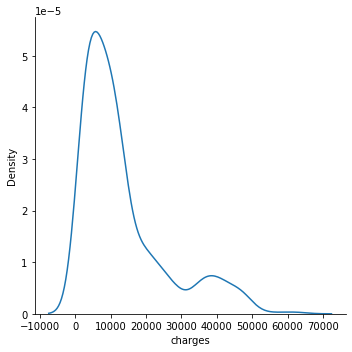

In [17]:
print("Shows the abnormality in charges, it is significantly right skewed \n")
_ = sns.displot(data=df.charges, kind="kde")

#### Covariance and Correlation

Covariance signifies the direction of the linear relationship between the two variables. 